In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as  mpl

In [67]:
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

In [68]:
def readData(y,s,c):
    df = pd.read_csv("lvr_land/"+ y +"-s" + s + "/" + c + "_lvr_land_A.csv",encoding='utf-8',low_memory=False)
    return df

In [69]:
def combineDF(df1,df2):
    df = pd.concat([df1,df2],axis = 0)
    return df

In [70]:
def selectFarmland(df):
    
    df = df[["鄉鎮市區","土地移轉總面積(平方公尺)","交易標的","都市土地使用分區","非都市土地使用分區","非都市土地使用編定","總價(元)","單價(元/平方公尺)"]]
    df_farmland = df[((df.交易標的 == "土地")&(((df.都市土地使用分區 =="農")&(df.非都市土地使用編定 !="丁種建築用地"))| ((df.非都市土地使用分區 == "一般農業區")& (df.非都市土地使用編定 !="丁種建築用地"))|((df.非都市土地使用分區 == '特定農業區')& (df.非都市土地使用編定 !="丁種建築用地")))) ]
    
    return df_farmland

In [71]:
def fillNanprice(df_farmland):
    #modify zero or nan price
    df_ok = df_farmland[(df_farmland["單價(元/平方公尺)"].notnull())&(df_farmland["單價(元/平方公尺)"] != "0")]
    df = df_farmland[(df_farmland["單價(元/平方公尺)"].isnull())|(df_farmland["單價(元/平方公尺)"] == "0")]
    df = df[(df['土地移轉總面積(平方公尺)'] != "0")&(df['總價(元)'] != "0")]
    df["單價(元/平方公尺)"] = calculateprice(df['總價(元)'],df['土地移轉總面積(平方公尺)'])
    df_farmland = pd.concat([df_ok,df],axis = 0)
    return df_farmland

In [72]:
def calculateprice(total_price,area):
    return pd.to_numeric(total_price)/pd.to_numeric(area)

In [73]:
def calculateMean(df_farmland):

    landpriceMean = pd.to_numeric(df_farmland['單價(元/平方公尺)']).mean()
   
    return landpriceMean

In [74]:
def calculateGain(cityMeandict,div):
    
    #dict to df
    arr = list(cityMeandict.items())
    df = pd.DataFrame(arr, columns=['年份','單價'])
    
    #逐年漲幅
    gain = df["單價"].pct_change(div)
    
    return gain

In [76]:
list_cityfilename = ['A','B','C','D','E','F','G','H','I','J','K','M','N','O','P','Q','T','U','V','W','X','Z']
list_city = ['台北市','台中市','基隆市','台南市','高雄市','新北市','宜蘭縣','桃園縣','嘉義市','新竹縣','苗栗縣','南投縣','彰化縣','新竹市','雲林縣','嘉義縣','屏東縣','花蓮縣','台東縣','金門縣','澎湖縣','連江縣']

s=4 #season
各年單價平均 ={}

for y in range(101,108):
    
    df = pd.DataFrame()
    
    while s<=4:
        for c in list_cityfilename:
            df_s =  readData(str(y),str(s),c)
            df = combineDF(df,df_s)
        if y == 107 and s == 2:
            break
        s = s+1
    s=1
    
    # select farmland
    df_farmland = selectFarmland(df)
    # fill nan price
    df_farmland = fillNanprice(df_farmland)
    #台灣各年平均單價
    各年單價平均[y] = calculateMean(df_farmland)
    
print(各年單價平均)

    

{101: 6525.607299135764, 102: 7893.5472148247645, 103: 7968.623572857118, 104: 7413.140830739281, 105: 7194.66496945417, 106: 7110.486659727884, 107: 7308.768965578705}


|101|6525.607299135764|
|102|7893.5472148247645|
|103|7968.623572857118|
|104|7413.140830739281|
|105|7194.66496945417|
|106|7110.486659727884|
|107|7308.768965578705|


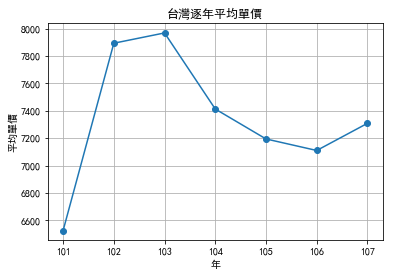

In [77]:
# 台灣各年平均單價 formated
for i in range(101,108):
    print("|"+str(i)+"|",end='')
    print(str(各年單價平均[i])+"|") 
# plot 台灣逐年平均
plt.plot(各年單價平均.keys(),各年單價平均.values(),marker='o',linestyle='solid')
plt.xlabel("年")
plt.ylabel("平均單價")
plt.title("台灣逐年平均單價")
plt.grid()   
plt.show()

In [78]:
#全國各年漲幅 formated
gain = calculateGain(各年單價平均,1)
#全國總漲幅 formated
totalgain = calculateGain(各年單價平均,6)

#全國各年漲幅 
gain_dict = {}

i=101 
for g in gain:
    gain_dict[i]=g*100 # %
    print("|"+str(i)+"|",end='')
    print(str(g*100)+"|") 
    i+=1


|101|nan|
|102|20.96264535976855|
|103|0.951110520899312|
|104|-6.9708744181358195|
|105|-2.9471430028575774|
|106|-1.1700101406205143|
|107|2.7885898017901534|


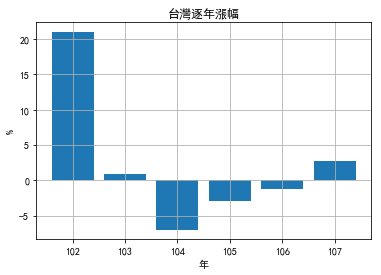

In [79]:
#plot 台灣逐年漲幅
plt.bar(gain_dict.keys(),gain_dict.values())
plt.xlabel("年")
plt.ylabel("%")
plt.title("台灣逐年漲幅")
plt.grid()
plt.savefig("台灣逐年漲幅")
plt.show()